In [3]:
# Import the basic Library of python #

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset #

data = pd.read_csv('D:\\ML-Projects\\Linear Regression\\dataset\\USA_Housing.csv')

In [5]:
# Display the first few rows of the dataset #

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
# Display the Information about the dataset #

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### The dataset having 5000 Rows & 7 Coloumn, all having numerical coloumn except address column.
### Here’s a brief overview of the columns:
##### 1. Avg. Area Income : It tells the average income in the particular area of house              
##### 2. Avg. Area House Age : It tell the average age of the house
##### 3. Avg. Area Number of Rooms : It tells the average no of room present in house    
##### 4. Avg. Area Number of Bedrooms : It tells the average no of bedroom in the house 
##### 5. Area Population : It tells the area population of USA house              
##### 6. Price : It tells the price the house based on above feature                        
##### 7. Address : It tells the address the USA house


In [7]:
# Display the Statical analysis of the datset #

data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

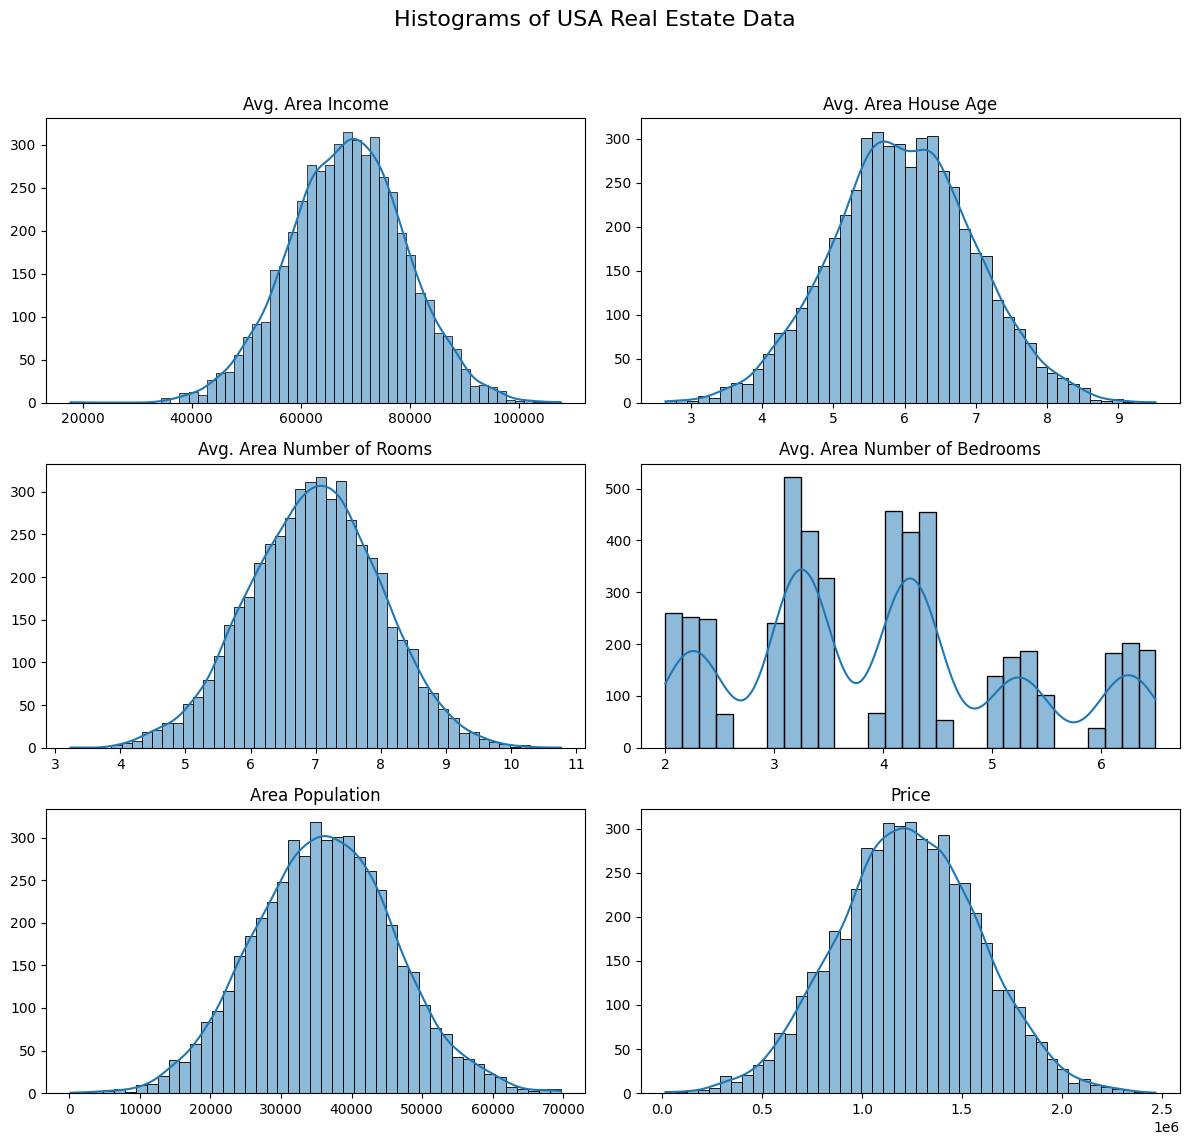

In [13]:
# Create histograms for the numerical columns #

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of USA Real Estate Data', fontsize=16)

cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

for i, col in enumerate(cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Data pre-processing #

In [9]:
# 1. Missing data checking

data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### There are no null values in the dataset

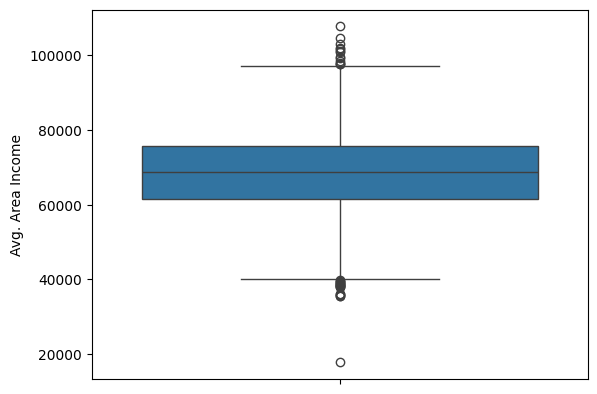

In [10]:
# 2. Checking the outliers in dataset

sns.boxplot(y='Avg. Area Income', data = data)
plt.show()

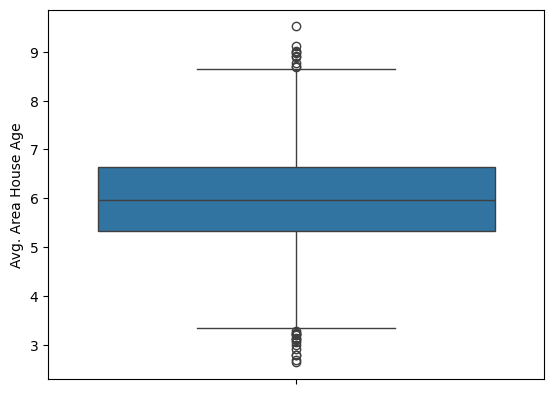

In [11]:
sns.boxplot(y='Avg. Area House Age', data = data)
plt.show()

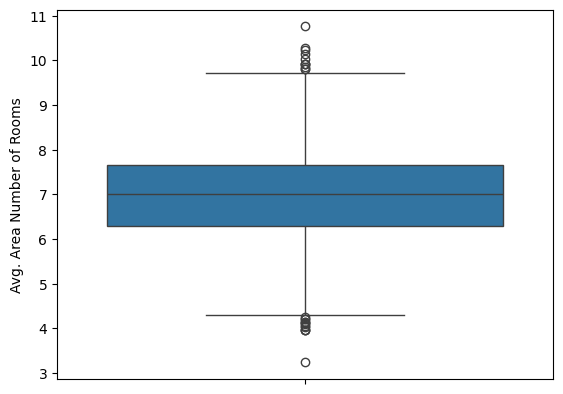

In [12]:
sns.boxplot(y='Avg. Area Number of Rooms', data = data)
plt.show()

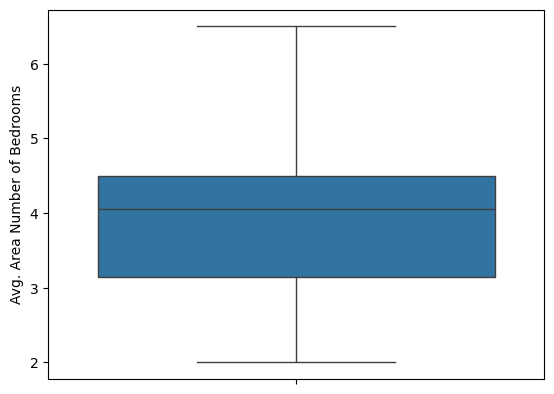

In [13]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data = data)
plt.show()

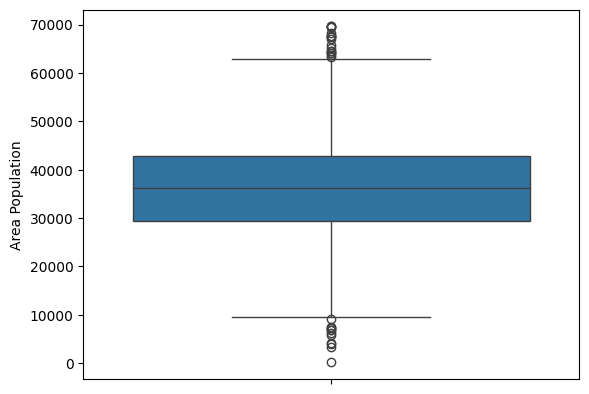

In [14]:
sns.boxplot(y='Area Population', data = data)
plt.show()

In [15]:
data = data.drop('Address', axis=1)
data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


In [16]:
# Handling the outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
Positive_outlier = Q3 + 1.5*IQR
Negative_outlier = Q1 - 1.5*IQR


In [17]:
print(Q1)
print('*****************************')
print(Q3)
print('*****************************')
print(IQR)
print('*****************************')
print(Positive_outlier)
print('*****************************')
print(Negative_outlier)
print('*****************************')


Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
*****************************
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
*****************************
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
*****************************
Avg. Area Income   

In [18]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

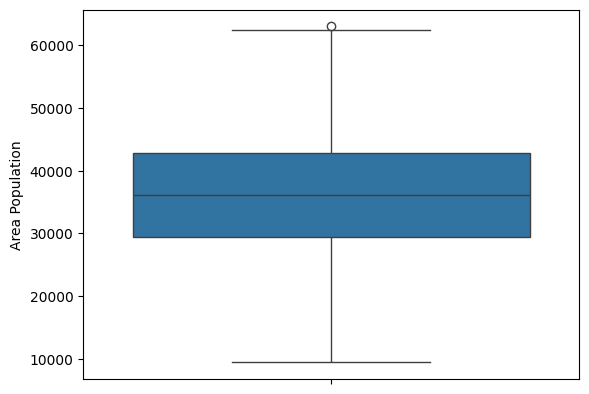

In [19]:
sns.boxplot(y='Area Population', data = data)
plt.show()

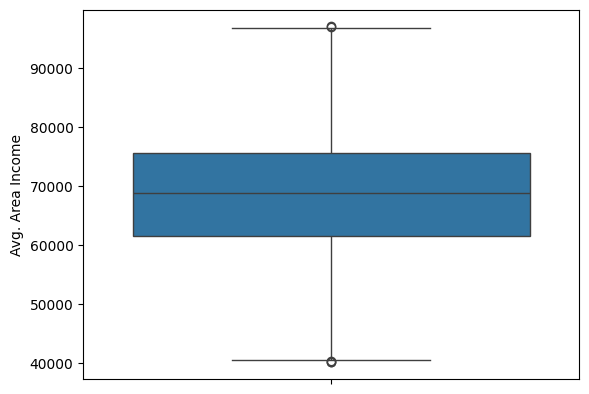

In [20]:
sns.boxplot(y='Avg. Area Income', data = data)
plt.show()

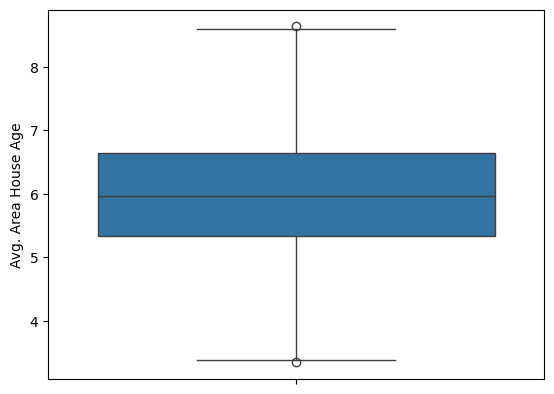

In [21]:
sns.boxplot(y='Avg. Area House Age', data = data)
plt.show()

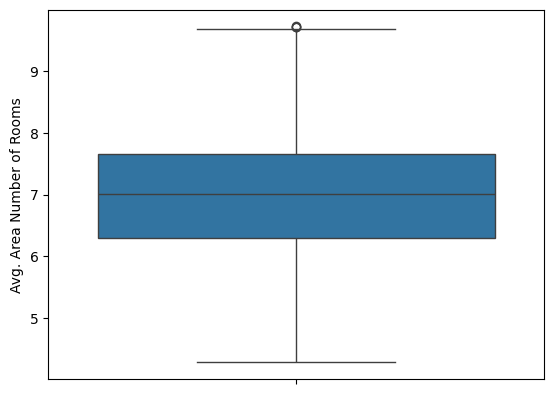

In [22]:
sns.boxplot(y='Avg. Area Number of Rooms', data = data)
plt.show()

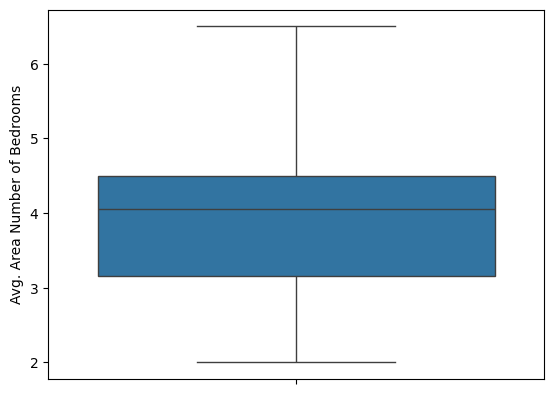

In [23]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data = data)
plt.show()

<Axes: >

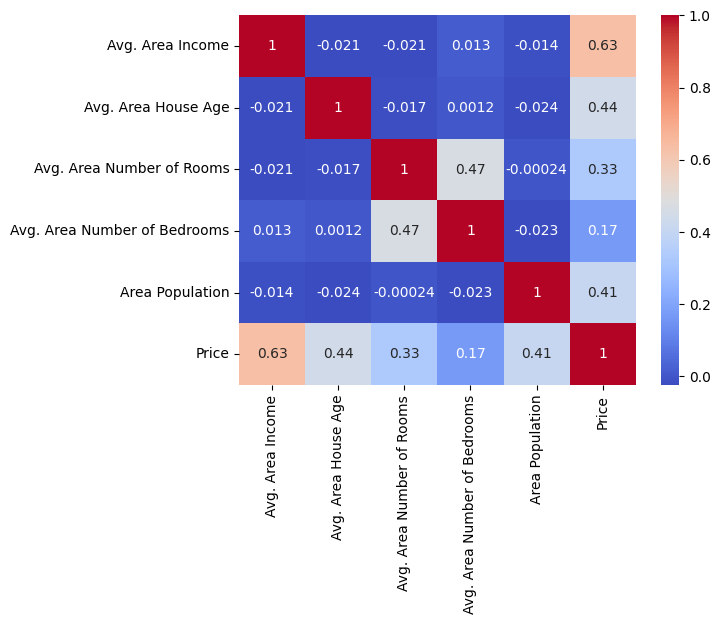

In [24]:
# Checking the corelation

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

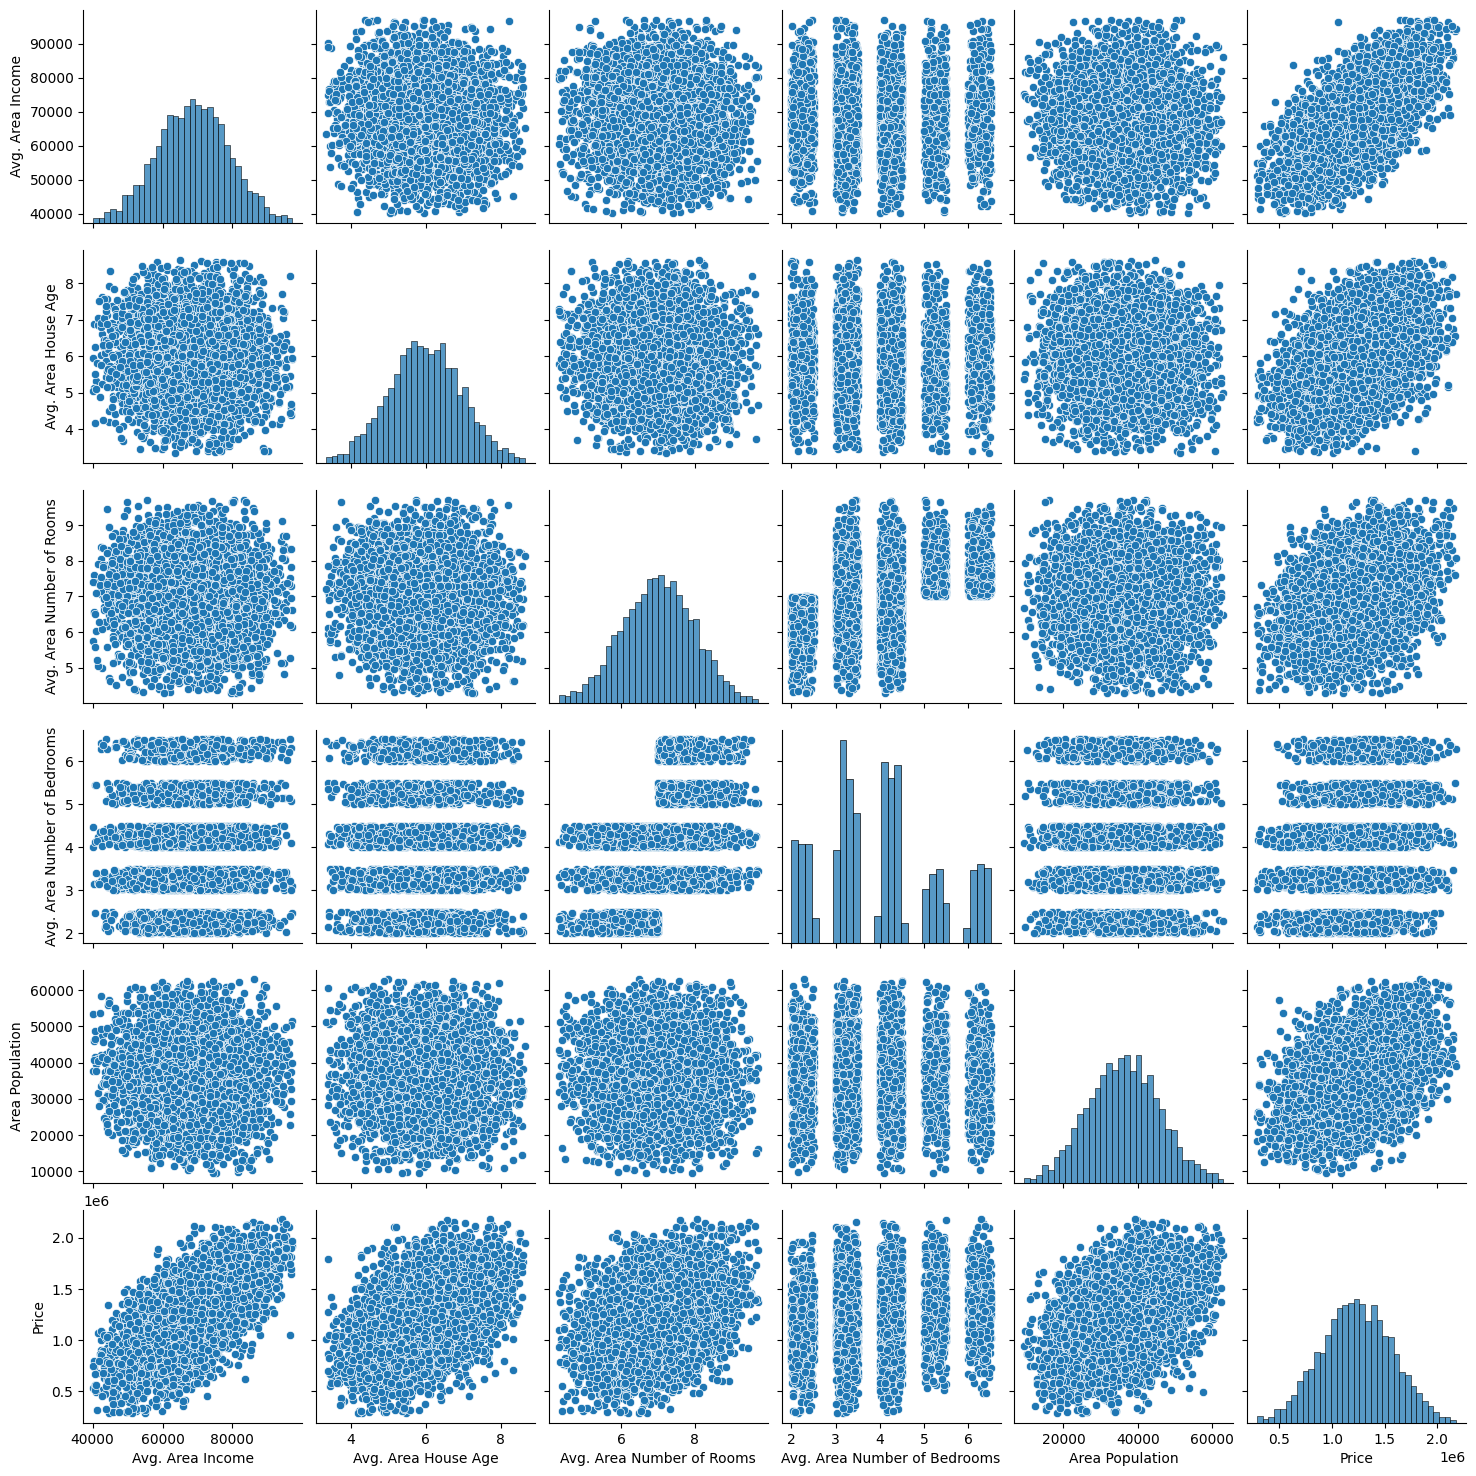

In [25]:
# Bivariate Analysis

sns.pairplot(data)
plt.show()

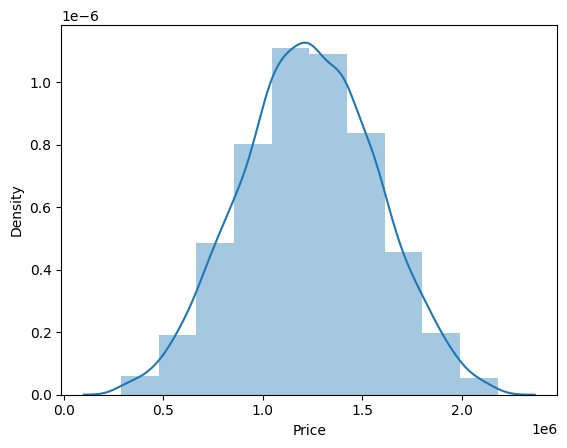

In [26]:
# Univariate analysis

sns.distplot(data['Price'],bins=10)
plt.show()

# Split the data into dependent & independent variable for feature scaling#

In [27]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [28]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174


In [29]:
y.head(2)

0    1.059034e+06
1    1.505891e+06
Name: Price, dtype: float64

# Feature Scaling #

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

In [31]:
# Variance inflation factor(VIF) checking to know the multicollinearity between independent & dependent variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variance inflation factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance inflation factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


### Spliting the data into train for building the model & test for model evaluation & prediction.

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_scaler,y,test_size=0.3,random_state=142)

In [43]:
# Shape of the data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3405, 5) (1460, 5) (3405,) (1460,)


### Building Linear Regression model

In [44]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() 
linear_model.fit(x_train,y_train)

LinearRegression()

### Predict the with test data

In [45]:
y_pred = linear_model.predict(x_test)
y_pred

array([1329921.66674312, 1280162.1650318 ,  531577.64189539, ...,
       1174651.03484937, 1396421.20820338, 1501216.10676149])

### Evaluation matrix to find the accuracy

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9076447738355076

### OLS( Ordinary Least Square) Method

In [55]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1,y_test1 = train_test_split(x,y,test_size=0.3,random_state=141)

In [48]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [56]:
reg_model = smf.OLS(endog= y_train1,exog= x_train1).fit()

In [57]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.998e+04
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                        0.00
Time:                        21:45:35   Log-Likelihood:                         -46888.
No. Observations:                3405   AIC:                                  9.379e+04
Df Residuals:                    3400   BIC:                                  9.382e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2910      0.319     32.227      0.000       9.665      10.917
Avg. Area House Age           5.097e+04   3509.492     14.524      0.000    4.41e+04    5.79e+04
Avg. Area Number of Rooms    -1.146e+04   3907.465     -2.934      0.003   -1.91e+04   -3801.734
Avg. Area Number of Bedrooms  7722.5522   3614.973      2.136      0.033     634.813    1.48e+04
Area Population                  7.9138      0.389     20.326      0.000       7.150       8.677
==============================================================================
Omnibus:                       12.253   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.551
Skew:                          -0.014   Prob(JB):                      0.00843
Kurtosis:                       2.742   Cond. No.                     9.50e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the normality

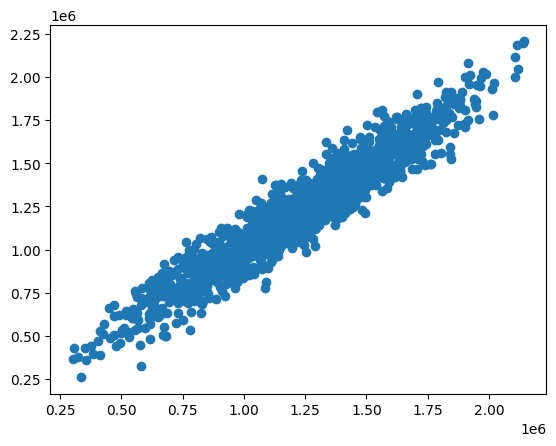

In [60]:
plt.scatter(y_test, y_pred)
plt.show()

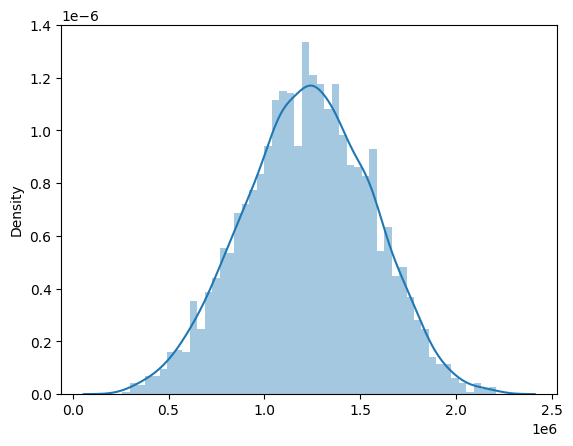

In [62]:
sns.distplot((y_test,y_pred), bins=50)
plt.show()

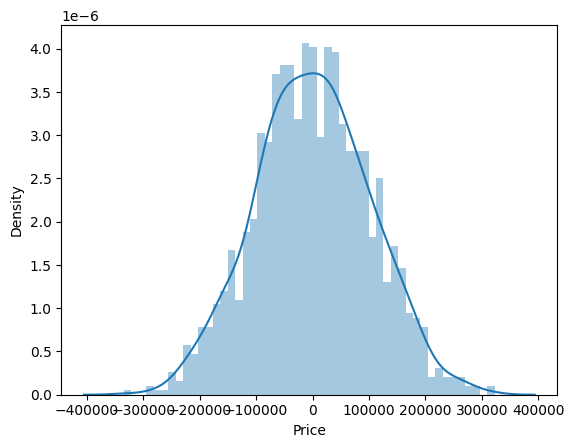

In [63]:
sns.distplot((y_test - y_pred), bins=50)
plt.show()

### Regularisation method to findout overfitting or underfitting 

### Ridge, Lasso, Elasticnet(Ridge+Lasso)

In [64]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Ridge Method

In [66]:
ridge_regr = Ridge(alpha=0.1)
ridge_regr.fit(x_train,y_train)
y_reg_pred = ridge_regr.predict(x_test)
r2_score(y_test, y_reg_pred)

0.9076454040673516

### Lasso Method

In [67]:
lasso_regr = Lasso(alpha=0.1)
lasso_regr.fit(x_train,y_train)
y_lasso_pred = lasso_regr.predict(x_test)
r2_score(y_test, y_lasso_pred)

0.9076447941154511

### Elasticnet Method

In [68]:
elestic_regr = ElasticNet(alpha=0.1,l1_ratio=0.5)
elestic_regr.fit(x_train,y_train)
y_elestic_pred = elestic_regr.predict(x_test)
r2_score(y_test, y_elestic_pred)

0.9062972422041476

### Linear Regression Method

In [69]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_linear_pred = linear_model.predict(x_test)
r2_score(y_test, y_linear_pred)

0.9076447738355076